# Linear Regression with Least Squares

## Overview

- Calculating least squares weights
- Reading data on dist to return `Pandas` DataFrame  
- Select data by column  
- Implement column cut-offs

### Learning Objectives

- Use Pandas to subset dataframes by a range of values
- Compare columns and rows of an array in matrices  
- Transpose, multiply, and find inverse of arrays 
- Use matrix operations to code least squares 
- Evaluate Ordinary Least Squares using Root Mean Squared Error and  R squared 
- Implement Ordinary Least Squares with Sklearn
- Demonstrate understanding of the mathematical foundations behind least squares regression 
- Use linear regression to make predictions about data


## Linear Regression with Least Squares

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression. 
As long as a few basic assumptions are fulfilled, linear regression using least squares is solvable exactly, without requiring approximation.

The vector of weights we are trying to find, $w_{LS}$, can be computed via:

$$w_{LS} = (X^T X)^{−1}X^T y,$$

where $X$ is the matrix of inputs and $y$ is the output vector from the training set.

In this equation, $X$ is always defined to have a vector of $1$ value(s) as its first column. In other words, even when there is only one input value for each data point, $X$ takes the form:

$$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$$

Similarly, for two inputs per data point, $X$ will take this form:
 
$$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$$

### Importing the data set and exploratory data analysis

For this tutorial, we will attempt to predict house prices using the above ground living area with a regression model on a housing price data set. More information about this dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations we'll use `matplotlib`.

Let's import the necessary libraries and load the data sets we will be using using the pandas `pd.read_csv()` function.

In [2]:
#Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Read the data set
tr_path = './data/train.csv'
data = pd.read_csv(tr_path)

We begin by performing some basic exploratory data analysis by using the function `head()` and the attribute `columns`.

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Next, let's plot the relationship between our variables of interest: the price for each house and the above ground living area in square feet.

We can do so by creating a scatter plot using `matplotlib`.

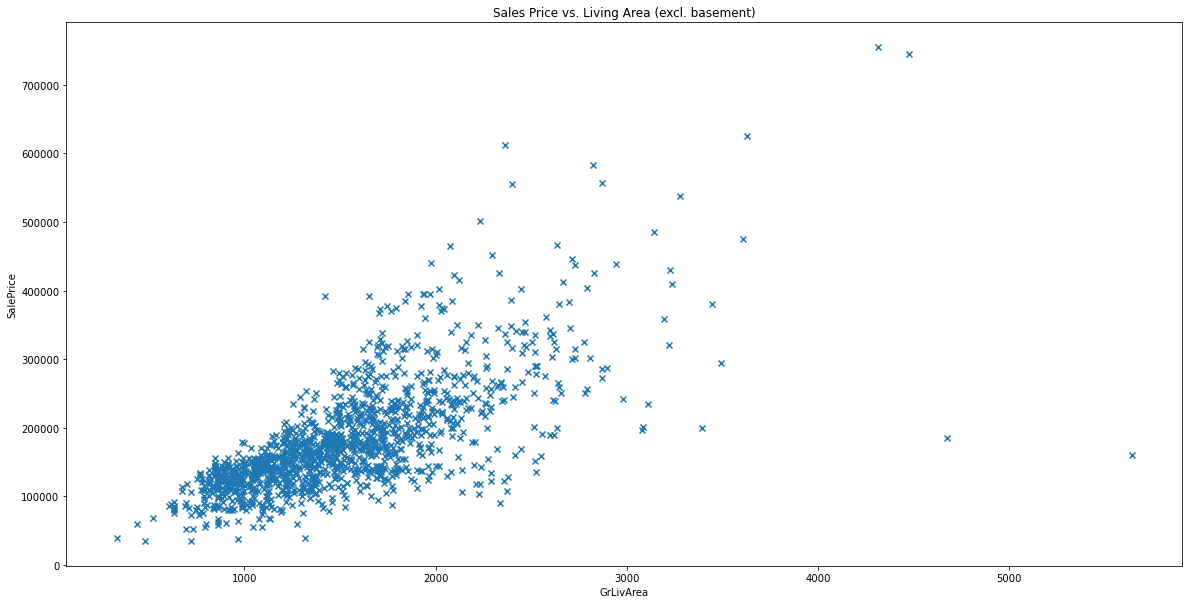

In [5]:
Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

## Coding Linear Regression

Given the equation above for $w_{LS}$, we have everything we need in order to solve a linear regression. In the following code cells, we will define all the necessery `Python` functions to complete step-by-step.

#### Coding function example:  Matrix inverse
Below is an example of a function that takes the inverse of a matrix. We use the `numpy` module and  the function `np.linalg.inv()`

In [7]:
def inverse_of_matrix(mat):
    
    matrix_inverse = np.linalg.inv(mat)
    
    return matrix_inverse

we will create a function `read_to_df` that takes, as input, the file_path of a .csv file and uses the appropriate `pandas` function to read the .csv file into a dataframe `df`.

In [8]:
def read_to_df(file_path):
    df = pd.read_csv(file_path)
    return df

We will create a function called `select_columns` that takes as inputs, a dataframe `df` and a *list* of column names. The function should return a dataframe that only has the columns specified in the list of column names.

In [9]:
def select_columns(data_frame, column_names):
    df = pd.DataFrame(data_frame)
    return df[list(column_names)]

We will create a function called `column_cutoff` that takes, as input, a `pandas` dataframe and a list of tuples.
The tuples should have the following format:`(column_name, min_value, max_value)`.
The function should return a dataframe which excludes rows where the value in a specified column exceeds `max_value` or is less than `min_value`.

In [10]:
def column_cutoff(data_frame, cutoffs):
    for i in cutoffs:
        column_name, min_value, max_value = i 
        data_frame = data_frame.loc[
            (data_frame[column_name] >= min_value) & (data_frame[column_name] <= max_value)
        ]
        
        return data_frame
        

In the next code cell, we will calculate $w_{LS}$ by using the inverse matrix function.

$$w_{LS} = (X^T X)^{−1}X^T y,$$

We will create a function  called `least_squares_weights` that takes, as input, two matricies corresponding to the `X` inputs and `y` targets (assume the matricies are of the correct dimensions), respectively. The function should execute the following steps:

- 1) Ensure that the number of rows of each matrix is greater than or equal to the number of columns. If not, transpose the matricies. In particular, the y input should end up as a $n\times1$ matrix, and the x input as a $n\times p$ matrix

- 2) Prepend an $n \times 1$ column of ones to the x input matrix

- 3) Use the above equation to calculate the least squares weight and return this vector.

In [11]:
def least_squares_weights(input_x, target_y):
    
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)
        
    input_x = np.c_[np.ones(input_x.shape[0]),input_x]
    
    W_LS = np.matmul(np.matmul(np.linalg.inv(np.matmul(input_x.T,input_x)), input_x.T), target_y)

    return W_LS

### Testing on Real Data

Now that we have code to read the data and perform matrix operations, we can put it all together to perform linear regression on a data set of our choosing.

In [12]:
def column_cutoff(data_frame, cutoffs):
    data_subset = data_frame
    print(cutoffs)
    for column_limits in cutoffs:
        print(column_limits[0])
        data_subset = data_subset.loc[data_subset[column_limits[0]] >= column_limits[1],:]
        data_subset = data_subset.loc[data_subset[column_limits[0]] <= column_limits[2],:]
    return data_subset
def least_square_weights(input_x, target_y):
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)
        
        
    ones = np.ones((len(target_y), 1), dtype=int)
    
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x), 
                                                        augmented_x)),
                                np.transpose(augmented_x))
    w_ls = np.matmul(left_multiplier, target_y)   
    
    return w_ls

In [13]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])


X = df_sub['GrLivArea'].values
Y = df_sub['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[18569.02585649]
 [  107.13035897]]


Great! We have just obtained the vector of weights for our model.

In the cell below, we plot the the price for each house vs the above ground living area in square feet and the line of least squares we have just obtained with our code.

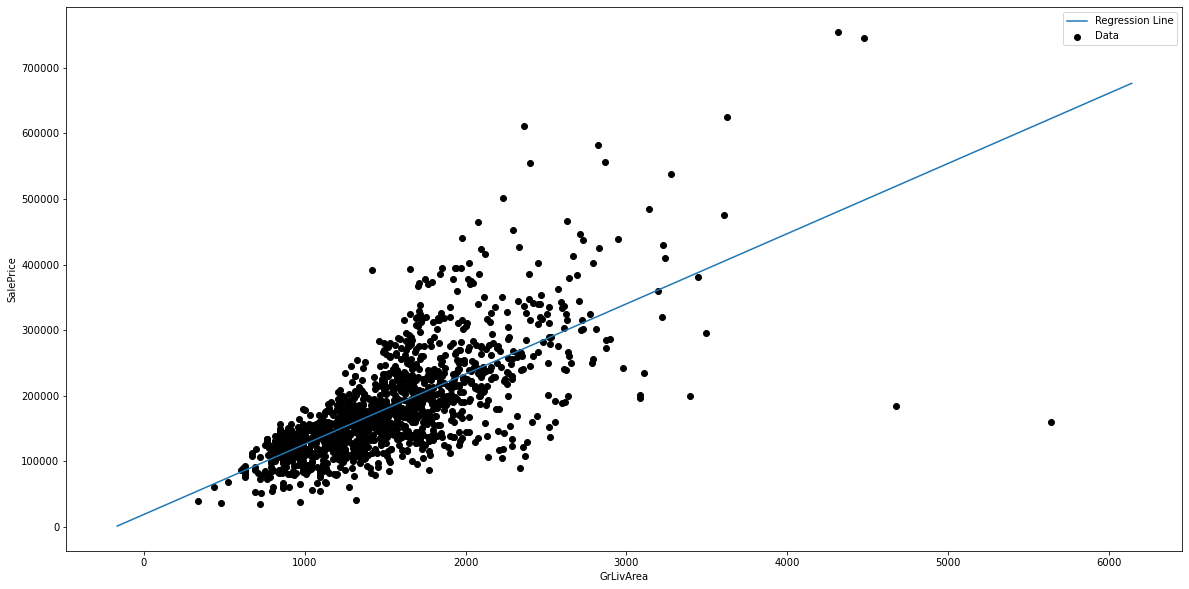

In [14]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

### Calculating root mean square error (RMSE)

Finally we want to check the RMSE.

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [15]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)

56034.303865279915


### sklearn implementation of linear regression with least squares

While it is useful to build and program our model from scratch, the next code cells will also introduce how to use conventional methods to fit each model. Linear regression with least squares in conveniently implemented in the  `scikit-learn` module (also called `sklearn`). 

In [16]:
from sklearn.linear_model import LinearRegression

skl_X = None
skl_Y = None

array = np.array(df_sub['GrLivArea'])
skl_X = df_sub[['GrLivArea']]
skl_Y = df_sub['SalePrice']
lr = LinearRegression().fit(skl_X, skl_Y)

print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 18569.02585648728
Coefficient: [107.13035897]


Oberve the result and compare to the weights we got it from the model we built from scratch and see how both results are the same!